In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Preparation

In [ ]:
train_data_dir = "/content/drive/MyDrive/PersonalProjects/CXR/datasets/train"
val_data_dir = "/content/drive/MyDrive/PersonalProjects/CXR/datasets/test"

class_subset = sorted(f for f in os.listdir(train_data_dir) if not f.startswith('.'))
print(class_subset)

['negative', 'positive']


In [ ]:
#central crop
def crop_center_square(image):
    img_height, img_width = image.shape[0:2]
    min_dim = min(img_height, img_width)
    start_x = (img_width // 2) - (min_dim // 2)
    start_y = (img_height // 2) - (min_dim // 2)
    
    img = image[start_y : start_y + min_dim, start_x : start_x + min_dim]
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

# Image Data Generator
Contains data augmentation 

In [ ]:
train_generator = ImageDataGenerator(rescale=1/255.,
                                     featurewise_center= False,
                                     samplewise_center= False,
                                     featurewise_std_normalization= False,
                                     samplewise_std_normalization=False,
                                     rotation_range= 10,     # 0-180
                                     zca_whitening=False,
                                     zoom_range=0.1,         # Randomly zoom image
                                     width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
                                     height_shift_range=0.2, # randomly shift images vertically (fraction of total height)
                                     horizontal_flip=True,   # randomly flip images
                                     vertical_flip=False,
                                     validation_split=0.0,
                                     preprocessing_function=crop_center_square)

val_generator  = ImageDataGenerator(rescale=1/255.,
                                    preprocessing_function=crop_center_square)

# Models
Defining the various models

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.resnet_v2 import ResNet101V2
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

BATCH_SIZE = 32
image_size = 224
channel = 3
lr = 1e-4

## VGG16

In [ ]:
# VGG16
vgg16_base_model = VGG16(weights='imagenet',
                         include_top= False, 
                         input_shape=(image_size, image_size, channel),
                         pooling='avg')

vgg16_base_model.trainable = False

vgg16_model = Sequential()
vgg16_model.add(vgg16_base_model)
vgg16_model.add(layers.Dense(256,activation='relu'))
vgg16_model.add(layers.Dropout(0.2))
vgg16_model.add(layers.Dense(len(class_subset),activation="softmax"))

vgg16_model.compile(optimizer=optimizers.Adam(learning_rate = lr), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

58900480/58889256 [==============================] - 0s 0us/step


## DenseNet121

In [ ]:
# DenseNet121
densenet_base_model = DenseNet121(weights='imagenet',
                                  include_top= False, 
                                  input_shape=(image_size, image_size, channel),
                                  pooling='avg')

densenet_base_model.trainable = False

densenet_model = Sequential()
densenet_model.add(densenet_base_model)
densenet_model.add(layers.Dense(256,activation='relu'))
densenet_model.add(layers.Dropout(0.2))
densenet_model.add(layers.Dense(len(class_subset),activation="softmax"))

densenet_model.compile(optimizer=optimizers.Adam(learning_rate = lr), 
                       loss='categorical_crossentropy', 
                       metrics=['accuracy'])

29097984/29084464 [==============================] - 0s 0us/step


## MobileNetV2 

In [ ]:
# MobileNetV2
mobilenet_base_model = MobileNetV2(weights='imagenet',
                                   include_top= False, 
                                   input_shape=(image_size, image_size, channel),
                                   pooling='avg')

mobilenet_base_model.trainable = False

mobilenet_model = Sequential()
mobilenet_model.add(mobilenet_base_model)
mobilenet_model.add(layers.Dense(256,activation='relu'))
mobilenet_model.add(layers.Dropout(0.2))
mobilenet_model.add(layers.Dense(len(class_subset),activation="softmax"))

mobilenet_model.compile(optimizer=optimizers.Adam(learning_rate = lr), 
                        loss='categorical_crossentropy', 
                        metrics=['accuracy'])

9420800/9406464 [==============================] - 0s 0us/step


## ResNet101v2

In [ ]:
# ResNet101v2
resnet101_base_model = ResNet101V2(weights='imagenet',
                                   include_top= False, 
                                   input_shape=(image_size, image_size, channel),
                                   pooling='avg')

resnet101_base_model.trainable = False

resnet101_model = Sequential()
resnet101_model.add(resnet101_base_model)
resnet101_model.add(layers.Dense(256,activation='relu'))
resnet101_model.add(layers.Dropout(0.2))
resnet101_model.add(layers.Dense(len(class_subset),activation="softmax"))

resnet101_model.compile(optimizer=optimizers.Adam(learning_rate = lr), 
                        loss='categorical_crossentropy', 
                        metrics=['accuracy'])

171327488/171317808 [==============================] - 1s 0us/step


# InceptionV3

In [ ]:
# InceptionV3
inception_base_model = InceptionV3(input_shape = (image_size, image_size, channel), 
                                   include_top = False, 
                                   weights = 'imagenet',
                                   pooling='avg')

inception_base_model.trainable = False

inception_model = Sequential()
inception_model.add(inception_base_model)
inception_model.add(layers.Dense(256,activation='relu'))
inception_model.add(layers.Dropout(0.2))
inception_model.add(layers.Dense(len(class_subset),activation="softmax"))

inception_model.compile(optimizer=optimizers.Adam(learning_rate = lr), 
                        loss='categorical_crossentropy', 
                        metrics=['accuracy'])

87924736/87910968 [==============================] - 1s 0us/step


# InceptionResNet

In [ ]:
# InceptionResNetV2
inceptionresnet_base_model = InceptionResNetV2(input_shape = (image_size, image_size, channel), 
                                               include_top = False, 
                                               weights="imagenet", 
                                               pooling='avg')

inceptionresnet_base_model.trainable = False

inceptionresnet = Sequential()
inceptionresnet.add(inceptionresnet_base_model)
inceptionresnet.add(layers.Dense(256,activation='relu'))
inceptionresnet.add(layers.Dropout(0.2))
inceptionresnet.add(layers.Dense(len(class_subset),activation="softmax"))

inceptionresnet.compile(optimizer=optimizers.Adam(learning_rate = lr), 
                        loss='categorical_crossentropy', 
                        metrics=['accuracy'])

219070464/219055592 [==============================] - 1s 0us/step


## Define data generators

In [ ]:
traingen = train_generator.flow_from_directory(train_data_dir,
                                               target_size=(image_size, image_size),
                                               class_mode='categorical',
                                               classes=class_subset,
                                               subset='training',
                                               batch_size=BATCH_SIZE, 
                                               shuffle=True,
                                               seed=21)

validgen = val_generator.flow_from_directory(val_data_dir,
                                             target_size=(image_size, image_size),
                                             classes=class_subset,
                                             batch_size=BATCH_SIZE,
                                             shuffle=True,
                                             seed=21)


Found 676 images belonging to 2 classes.
Found 408 images belonging to 2 classes.


In [ ]:
model_dict = {
    "vgg16": vgg16_model,
    "inceptionv3": inception_model,
    "inception_resnet": inceptionresnet,
    "densenet121": densenet_model,
    "mobilenetv2": mobilenet_model,
    "resnet101": resnet101_model
}

weightfile_dict = {
    "vgg16" : 'vgg16_model.hdf5',
    "inceptionv3" : 'inceptionv3_model.hdf5',
    "inception_resnet" : 'inception_resnet_model.hdf5',
    "densenet121" : 'densenet121_model.hdf5',
    "mobilenetv2" : 'mobilenetv2_model.hdf5',
    "resnet101"   : 'resnet101_model.hdf5'    
}

historyfile_dict = {
    "vgg16" : 'vgg16_history.csv',
    "inceptionv3" : 'inceptionv3_history.csv',
    "inception_resnet" : 'inception_resnet_history.csv',
    "densenet121" : 'densenet121_history.csv',
    "mobilenetv2" : 'mobilenetv2_history.csv',
    "resnet101"   : 'resnet101_history.csv'    
}

In [ ]:
class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

# Modeling Training & Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import CSVLogger

In [ ]:
n_epochs = 10

# Callback Function: EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True, mode='max')

# Callback Function: Reduce learning rate on plateau
red_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, epsilon=0.0001, patience=2, verbose=1)

for key in model_dict:
    print ("### Training {} ###".format(key.upper()))

    model = model_dict[key]

    best_checkpoint = ModelCheckpoint(weightfile_dict[key],
                                      save_weights_only=False, 
                                      save_best_only=True,
                                      monitor='val_accuracy',
                                      mode='max',
                                      verbose=1)

    history_logger = CSVLogger(historyfile_dict[key], separator=",", append=True)

    history = model.fit(traingen,
                        batch_size=BATCH_SIZE,
                        epochs=n_epochs,
                        validation_data=validgen,
                        steps_per_epoch=traingen.samples // BATCH_SIZE,
                        validation_steps=validgen.samples // BATCH_SIZE,
                        callbacks=[best_checkpoint, history_logger, early_stop], #red_lr
                        verbose=1)

### Training VGG16 ###
Epoch 1/10
21/21 [==============================] - ETA: 0s - loss: 0.4871 - accuracy: 0.8152 
Epoch 1: val_accuracy improved from -inf to 0.71354, saving model to vgg16_model.hdf5
21/21 [==============================] - 555s 27s/step - loss: 0.4871 - accuracy: 0.8152 - val_loss: 0.6759 - val_accuracy: 0.7135
Epoch 2/10
21/21 [==============================] - ETA: 0s - loss: 0.4834 - accuracy: 0.8155 
Epoch 2: val_accuracy did not improve from 0.71354
21/21 [==============================] - 556s 27s/step - loss: 0.4834 - accuracy: 0.8155 - val_loss: 0.6263 - val_accuracy: 0.7057
Epoch 3/10
21/21 [==============================] - ETA: 0s - loss: 0.4713 - accuracy: 0.8121 
Epoch 3: val_accuracy did not improve from 0.71354
21/21 [==============================] - 540s 26s/step - loss: 0.4713 - accuracy: 0.8121 - val_loss: 0.5987 - val_accuracy: 0.7083
Epoch 4/10
21/21 [==============================] - ETA: 0s - loss: 0.4468 - accuracy: 0.8152 
Epoch 4: val_acc

'    ## Model evaluation\n    preds = model.predict(testgen)\n    preds = np.argmax(preds, axis=1)\n\n    report = classification_report(testgen.classes, preds, target_names=class_indices.values())\n    print(report)\n    \n    with open("classification_reports.txt", "a") as f:\n        print("{} CLASSIFICATION REPORT\n".format(key.upper()), file=f)\n        print(report, file=f)\n\n    show_confusion_matrix(testgen.classes, preds, key, class_indices)\n    \n    acc = accuracy_score(testgen.classes, preds)\n    with open("model_accuracy.txt", "a") as f:\n        print("{} model Accuracy: {:.2f}%".format(key.upper(), acc * 100))\n        print("{} model Accuracy: {:.2f}%".format(key.upper(), acc * 100), file=f)\n\n    print("\n")'

# Plot Graphs

In [ ]:
import seaborn as sns
sns.set_theme()

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

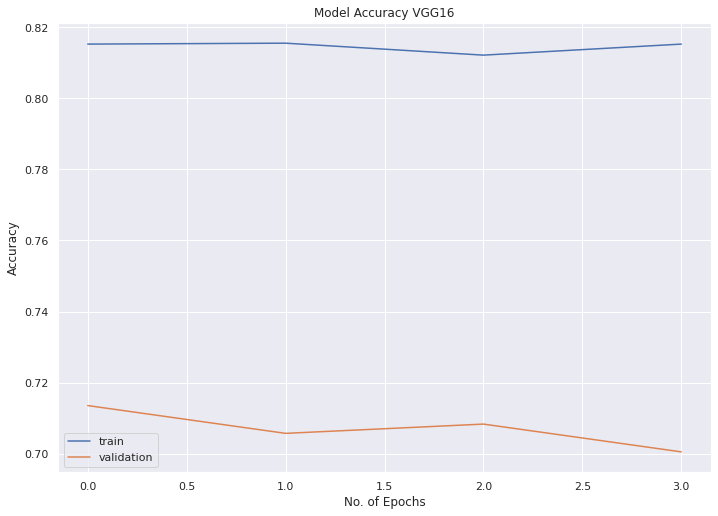

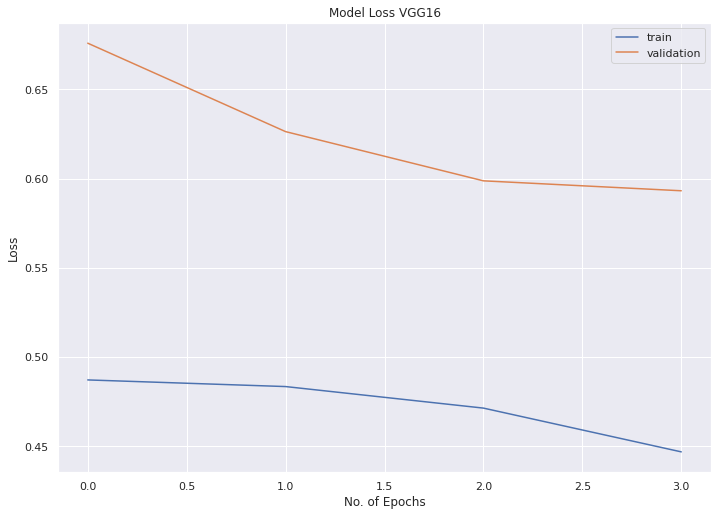

In [ ]:
history = pd.read_csv("vgg16_history.csv")

plt.plot(history['epoch'], history['accuracy'])
plt.plot(history['epoch'], history['val_accuracy'])
plt.title('Model Accuracy VGG16')
plt.legend(['train', 'validation'])
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.figure()

plt.plot(history['epoch'], history['loss'])
plt.plot(history['epoch'], history['val_loss'])
plt.title('Model Loss VGG16')
plt.legend(['train', 'validation'])
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.show()

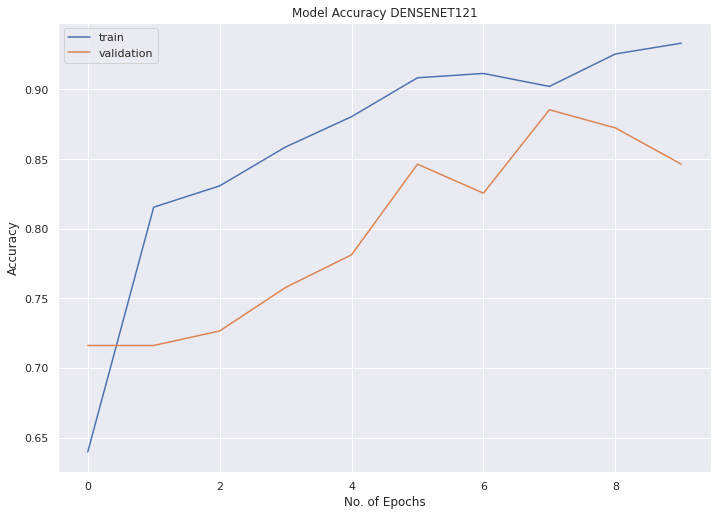

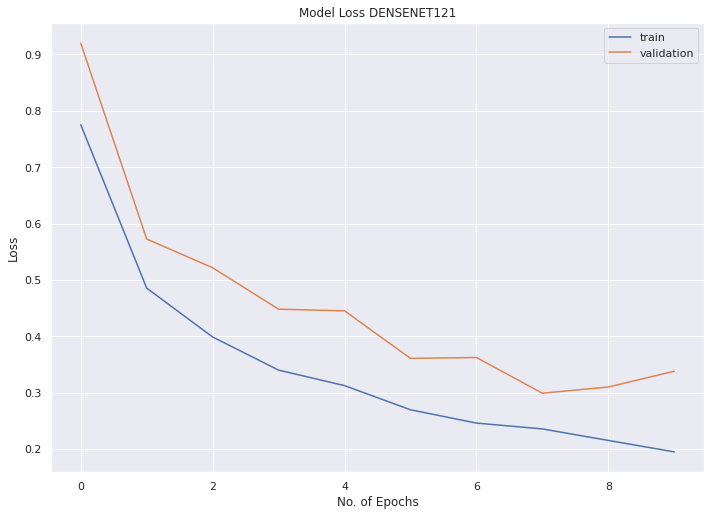

In [ ]:
history = pd.read_csv("densenet121_history.csv")

plt.plot(history['epoch'], history['accuracy'])
plt.plot(history['epoch'], history['val_accuracy'])
plt.title('Model Accuracy DENSENET121')
plt.legend(['train', 'validation'])
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.figure()

plt.plot(history['epoch'], history['loss'])
plt.plot(history['epoch'], history['val_loss'])
plt.title('Model Loss DENSENET121')
plt.legend(['train', 'validation'])
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.show()

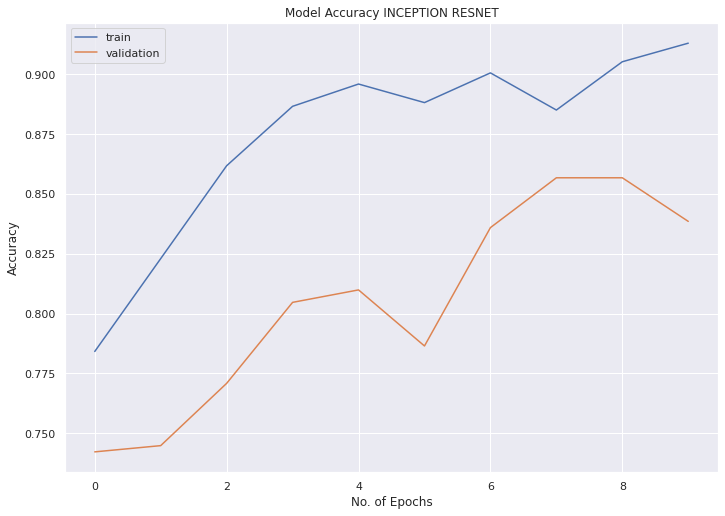

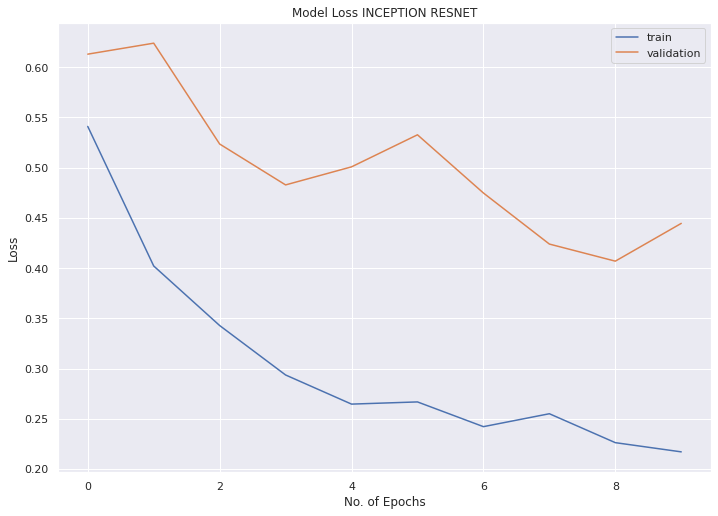

In [ ]:
history = pd.read_csv("inception_resnet_history.csv")

plt.plot(history['epoch'], history['accuracy'])
plt.plot(history['epoch'], history['val_accuracy'])
plt.title('Model Accuracy INCEPTION RESNET')
plt.legend(['train', 'validation'])
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.figure()

plt.plot(history['epoch'], history['loss'])
plt.plot(history['epoch'], history['val_loss'])
plt.title('Model Loss INCEPTION RESNET')
plt.legend(['train', 'validation'])
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.show()

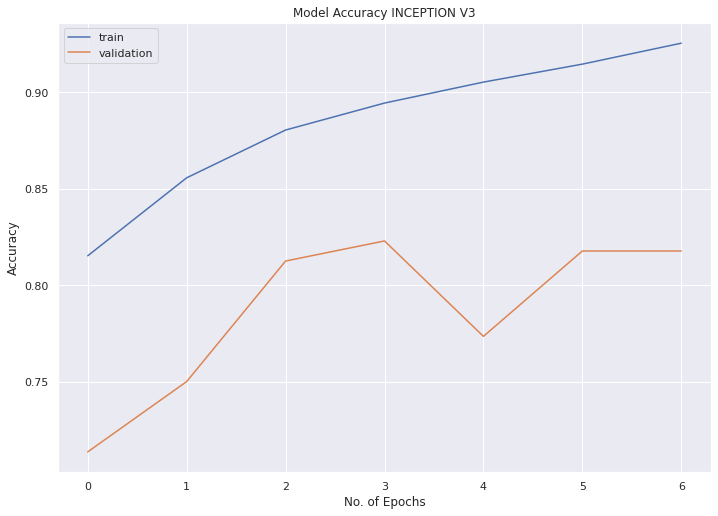

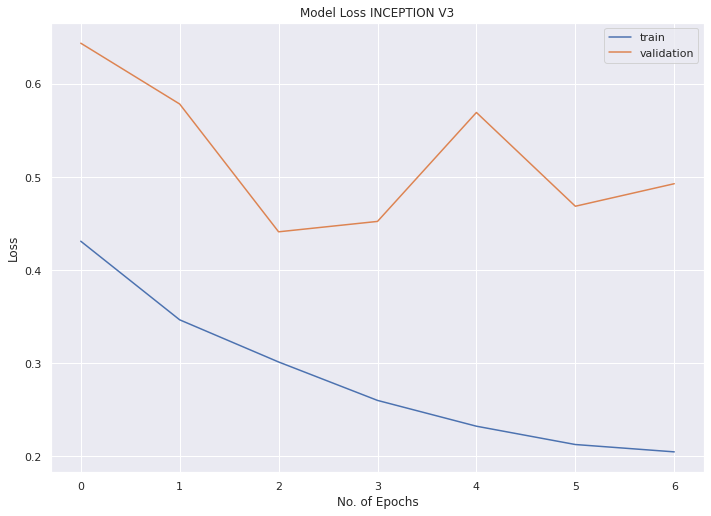

In [ ]:
history = pd.read_csv("inceptionv3_history.csv")

plt.plot(history['epoch'], history['accuracy'])
plt.plot(history['epoch'], history['val_accuracy'])
plt.title('Model Accuracy INCEPTION V3')
plt.legend(['train', 'validation'])
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.figure()

plt.plot(history['epoch'], history['loss'])
plt.plot(history['epoch'], history['val_loss'])
plt.title('Model Loss INCEPTION V3')
plt.legend(['train', 'validation'])
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.show()

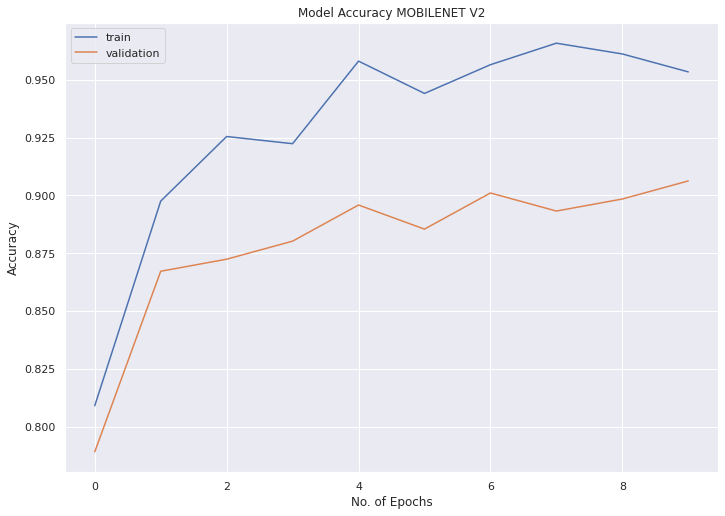

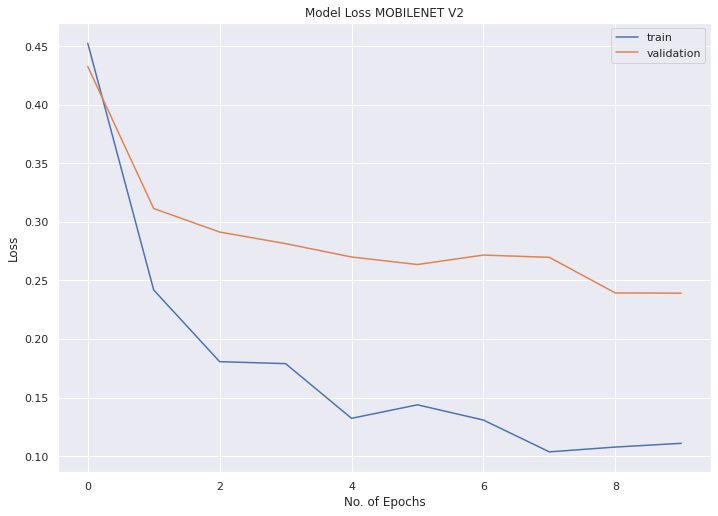

In [ ]:
history = pd.read_csv("mobilenetv2_history.csv")

plt.plot(history['epoch'], history['accuracy'])
plt.plot(history['epoch'], history['val_accuracy'])
plt.title('Model Accuracy MOBILENET V2')
plt.legend(['train', 'validation'])
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.figure()

plt.plot(history['epoch'], history['loss'])
plt.plot(history['epoch'], history['val_loss'])
plt.title('Model Loss MOBILENET V2')
plt.legend(['train', 'validation'])
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.show()

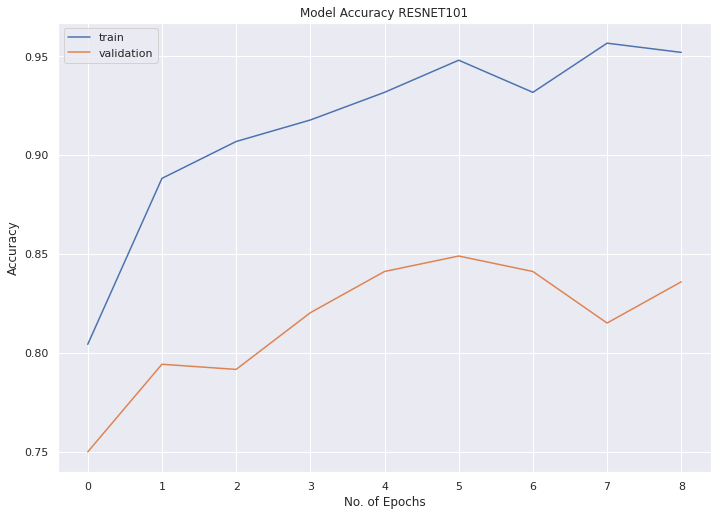

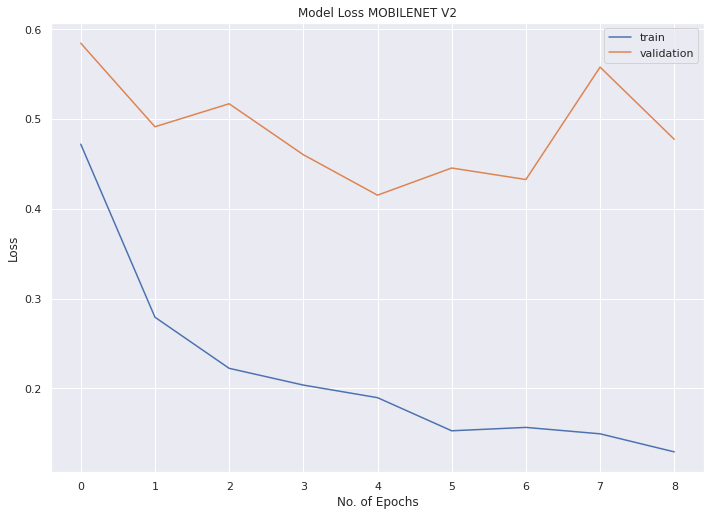

In [ ]:
history = pd.read_csv("resnet101_history.csv")

plt.plot(history['epoch'], history['accuracy'])
plt.plot(history['epoch'], history['val_accuracy'])
plt.title('Model Accuracy RESNET101')
plt.legend(['train', 'validation'])
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.figure()

plt.plot(history['epoch'], history['loss'])
plt.plot(history['epoch'], history['val_loss'])
plt.title('Model Loss MOBILENET V2')
plt.legend(['train', 'validation'])
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
res101 = pd.read_csv("resnet101_history.csv")
mbnetv2 = pd.read_csv("mobilenetv2_history.csv")
inceptv3 = pd.read_csv("inceptionv3_history.csv")
inceptres = pd.read_csv("inception_resnet_history.csv")
dense121 = pd.read_csv("densenet121_history.csv")
vgg16 = pd.read_csv("vgg16_history.csv")


Text(0, 0.5, 'Accuracy')

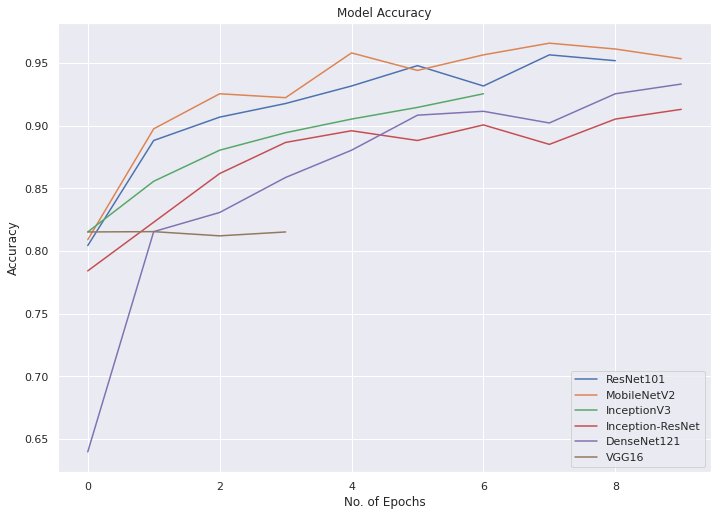

In [ ]:
plt.plot(res101['epoch'], res101['accuracy'])
plt.plot(mbnetv2['epoch'], mbnetv2['accuracy'])
plt.plot(inceptv3['epoch'], inceptv3['accuracy'])
plt.plot(inceptres['epoch'], inceptres['accuracy'])
plt.plot(dense121['epoch'], dense121['accuracy'])
plt.plot(vgg16['epoch'], vgg16['accuracy'])

plt.title('Model Accuracy')
plt.legend(['ResNet101', 'MobileNetV2', 'InceptionV3', 'Inception-ResNet', 'DenseNet121', 'VGG16'])
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Validation Accuracy')

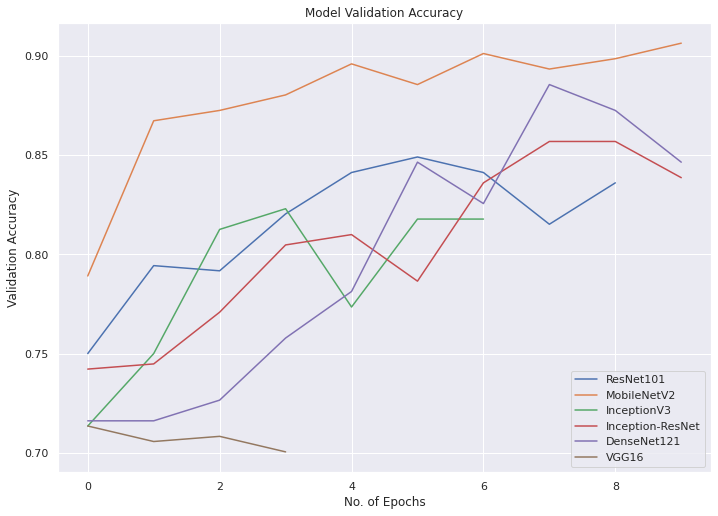

In [ ]:
plt.plot(res101['epoch'], res101['val_accuracy'])
plt.plot(mbnetv2['epoch'], mbnetv2['val_accuracy'])
plt.plot(inceptv3['epoch'], inceptv3['val_accuracy'])
plt.plot(inceptres['epoch'], inceptres['val_accuracy'])
plt.plot(dense121['epoch'], dense121['val_accuracy'])
plt.plot(vgg16['epoch'], vgg16['val_accuracy'])

plt.title('Model Validation Accuracy')
plt.legend(['ResNet101', 'MobileNetV2', 'InceptionV3', 'Inception-ResNet', 'DenseNet121', 'VGG16'])
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')

Text(0, 0.5, 'Loss')

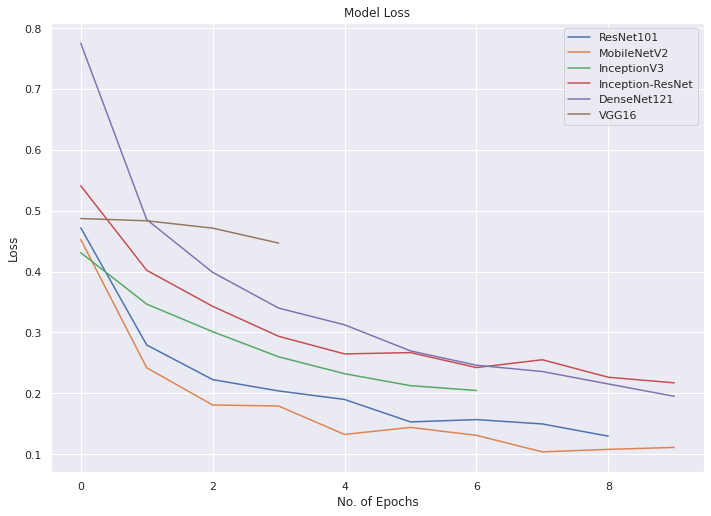

In [ ]:
plt.plot(res101['epoch'], res101['loss'])
plt.plot(mbnetv2['epoch'], mbnetv2['loss'])
plt.plot(inceptv3['epoch'], inceptv3['loss'])
plt.plot(inceptres['epoch'], inceptres['loss'])
plt.plot(dense121['epoch'], dense121['loss'])
plt.plot(vgg16['epoch'], vgg16['loss'])

plt.title('Model Loss')
plt.legend(['ResNet101', 'MobileNetV2', 'InceptionV3', 'Inception-ResNet', 'DenseNet121', 'VGG16'])
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Validation Loss')

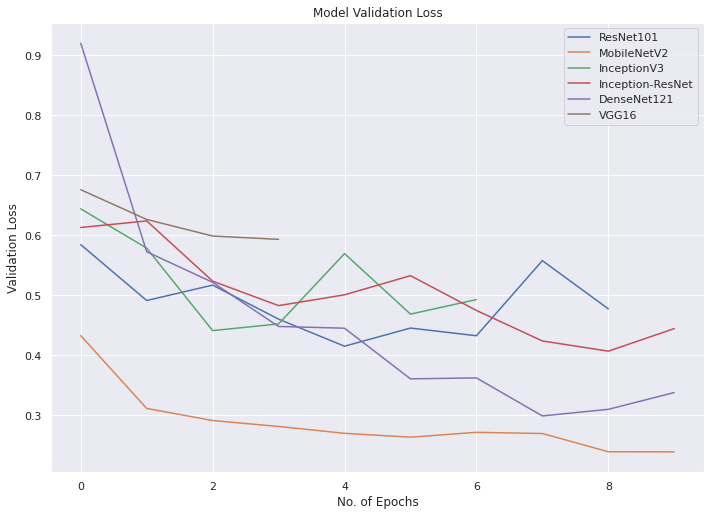

In [ ]:
plt.plot(res101['epoch'], res101['val_loss'])
plt.plot(mbnetv2['epoch'], mbnetv2['val_loss'])
plt.plot(inceptv3['epoch'], inceptv3['val_loss'])
plt.plot(inceptres['epoch'], inceptres['val_loss'])
plt.plot(dense121['epoch'], dense121['val_loss'])
plt.plot(vgg16['epoch'], vgg16['val_loss'])

plt.title('Model Validation Loss')
plt.legend(['ResNet101', 'MobileNetV2', 'InceptionV3', 'Inception-ResNet', 'DenseNet121', 'VGG16'])
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Loss')